In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def CurrentO(E,i_l,A0,E0):
    """
    Definindo corrente para caso em que inicilamente temos somente Elementos Oxidados
    """
    R = 8.31
    F = 96485.33121
    T = 25+273
    n = 1
    return i_l / ( np.exp((E-E0)*n*F / (R*T))+1 )
def CurrentRO(E,i_l,i_c,D,E0):
    """
    Definindo corrente para caso em que inicilamente temos Elementos Reduzidos e Oxidados
    """
    R = 8.31
    F = 96485.33121
    T = 25+273
    n = 1
    return (i_l + i_c * D *np.exp((E-E0)*n*F / (R*T)) )/ ( D*np.exp((E-E0)*n*F / (R*T))+1 )

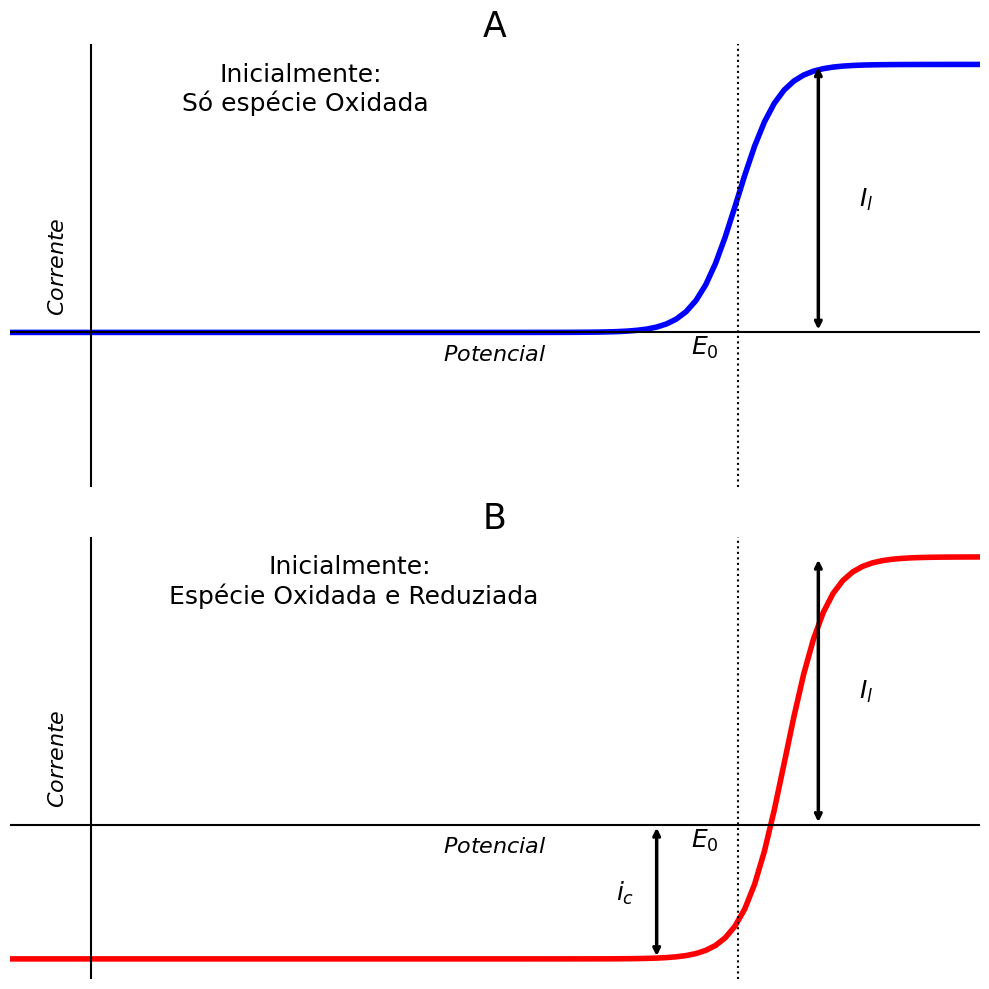

In [4]:
E = np.linspace(1,-0.2,100)
E0 = 0.1
i_l = 1
i_c = -0.5

# Criar gráficos lado a lado
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=True)

# Plotar o primeiro gráfico
axes[0].plot(E, CurrentO(E, i_l=i_l, A0=10, E0=E0), color='b',lw=4)
axes[0].annotate("Inicialmente:\n Só espécie Oxidada", xy=(0.3, 0.9), xycoords="axes fraction",
                 fontsize=18, ha="center", va="center")

# Plotar o segundo gráfico
axes[1].plot(E, CurrentRO(E, i_l=i_l, i_c=i_c, D=10, E0=E0), color='r',lw = 4)
axes[1].annotate("Inicialmente:\n Espécie Oxidada e Reduziada", xy=(0.35, 0.9), xycoords="axes fraction",
                 fontsize=18, ha="center", va="center")

A = ['A','B']

# Ajustar os gráficos removendo os valores numéricos dos eixos
i = 0
for ax in axes:
    ax.set_xticks([])  # Remove os valores numéricos do eixo x
    ax.set_yticks([])  # Remove os valores numéricos do eixo y
    ax.spines['top'].set_visible(False)  # Remove a borda superior
    ax.spines['right'].set_visible(False)  # Remove a borda direita
    ax.spines['bottom'].set_visible(False)  # Remove a borda inferior
    ax.spines['left'].set_visible(False)  # Remove a borda esquerda
    ax.axhline(0, linestyle="-", color="black")  # Cria linha horizontal
    ax.axvline(E[0]-0.1, linestyle="-", color="black")  # Cria linha vertical
    ax.annotate("$Corrente$", xy=(0.05, 0.5), xycoords="axes fraction",
                    fontsize=16, ha="center", va="center", rotation=90)
    ax.annotate("$Potencial$", xy=(0.5, 0.3), xycoords="axes fraction",
                    fontsize=16, ha="center", va="center")

    # Setas de dupla ponta indo de I=0 até I_l e I_c, ligeiramente à direita de E0
    ax.annotate("", xy=(E0 -0.1, i_l), xytext=(E0 -0.1, 0),
                arrowprops=dict(arrowstyle="<->", color="black", lw=2.5))
    ax.text(E0 - 0.15, i_l / 2, "$I_l$", fontsize=18, color="black", va="center")

    if i != 0:
        ax.annotate("", xy=(E0 + 0.1, i_c), xytext=(E0 + 0.1, 0),
                arrowprops=dict(arrowstyle="<->", color="black", lw=2.5))
        ax.text(E0 + 0.15, i_c / 2, "$i_c$", fontsize=18, color="black", va="center")

    ax.axvline(0.1, linestyle=":", color="black")  # Marcador de E0
    ax.text(E0+0.04, -0.08, "$E_0$", ha="center", fontsize=18)  # Rótulo para E0
    
    ax.set_title(A[i], fontsize=25)
    i += 1

    ax.set_xlim(E[0], E[-1])

plt.tight_layout()
plt.savefig('Nernst.png', dpi=300)
